In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import re
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.metrics import (
    classification_report as creport
)
from google.colab import files
uploaded= files.upload ()

### **Load the Binary Datset**

In [ ]:
import io
df= pd.read_excel(io.BytesIO(uploaded['BinaryPublicFigures.xlsx']))
df= df[['Text','Label']]
df

### **Load the Multi Datset**

In [ ]:
# from google.colab import files
# uploaded= files.upload ()

In [ ]:
# import io
# Art= pd.read_excel(io.BytesIO(uploaded['Art.xlsx']))
# Art= Art[['Text','Label']]

In [ ]:
# from google.colab import files
# uploaded= files.upload ()

In [ ]:
# import io
# Business= pd.read_excel(io.BytesIO(uploaded['Business.xlsx']))
# Business= Business[['Text','Label']]

In [ ]:
# from google.colab import files
# uploaded= files.upload ()

In [ ]:
# import io
# Politics= pd.read_excel(io.BytesIO(uploaded['Politics.xlsx']))
# Politics= Politics[['Text','Label']]

In [ ]:
# from google.colab import files
# uploaded= files.upload ()

In [ ]:
# import io
# Judiciary= pd.read_excel(io.BytesIO(uploaded['Judiciary.xlsx']))
# Judiciary= Judiciary[['Text','Label']]

In [ ]:
# from google.colab import files
# uploaded= files.upload ()

In [ ]:
# import io
# Sports= pd.read_excel(io.BytesIO(uploaded['Sports.xlsx']))
# Sports= Sports[['Text','Label']]

In [ ]:
# from google.colab import files
# uploaded= files.upload ()

In [ ]:
# import io
# Literature= pd.read_excel(io.BytesIO(uploaded['Literature.xlsx']))
# Literature= Literature[['Text','Label']]

In [ ]:
# Business = Business[Business['Label'] == 0]
# Literature = Literature[Writer['Label'] == 0]
# Sports = Sports[Sports['Label'] == 0]
# Judiciary = Judiciary[Judiciary['Label'] == 0]
# Politics = Politics[Politics['Label'] == 0]
# Art = Art[Art['Label'] == 0]

In [ ]:
# Literature['Label'] = Literature['Label'].replace([0],[1])
# Sports['Label'] = Sports['Label'].replace([0],[2])
# Judiciary['Label'] = Judiciary['Label'].replace([0],[3])
# Politics['Label'] = Politics['Label'].replace([0],[4])
# Art['Label'] = Art['Label'].replace([0],[5])

In [ ]:
# frames= [Literature,Sports, Judiciary, Politics, Art, Business]
# df= pd.concat(frames)

In [ ]:
df['Label'].value_counts()

In [ ]:
# df["Label"] = df["Label"].astype(str).astype(int)
# dataTypeObj = df.dtypes['Label']
# print(dataTypeObj)

In [ ]:
!git clone https://github.com/aub-mind/arabert.git


Cloning into 'arabert'...
remote: Enumerating objects: 564, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (252/252), done.
remote: Total 564 (delta 188), reused 247 (delta 92), pack-reused 214
Receiving objects: 100% (564/564), 9.16 MiB | 24.49 MiB/s, done.
Resolving deltas: 100% (311/311), done.


In [ ]:
!pip install -q transformers
!pip install -q datasets
!pip install -q farasapy
!pip install -q pyarabic
!pip install -q emoji

     |████████████████████████████████| 4.0 MB 5.3 MB/s 
     |████████████████████████████████| 596 kB 42.0 MB/s 
     |████████████████████████████████| 895 kB 55.1 MB/s 
     |████████████████████████████████| 77 kB 4.7 MB/s 
     |████████████████████████████████| 6.6 MB 37.3 MB/s 
     |████████████████████████████████| 325 kB 5.3 MB/s 
     |████████████████████████████████| 136 kB 62.0 MB/s 
     |████████████████████████████████| 212 kB 57.5 MB/s 
     |████████████████████████████████| 1.1 MB 44.3 MB/s 
     |████████████████████████████████| 127 kB 55.9 MB/s 
     |████████████████████████████████| 271 kB 49.3 MB/s 
     |████████████████████████████████| 144 kB 58.5 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is

In [ ]:
import pandas as pd 

from sklearn.model_selection import train_test_split

from pathlib import Path

import torch
from torch.utils.data import Dataset, DataLoader
!pip install transformers
import transformers
from transformers import AutoModel, BertTokenizerFast, AutoModelForSequenceClassification, Trainer, TrainingArguments

In [ ]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(df['Text'], df['Label'], random_state=42, 
                                                                    test_size=0.3)

val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, random_state=42, 
                                                                test_size=0.5)

len(train_texts), len(val_texts), len(test_texts)

(17154, 3676, 3677)

In [ ]:
BERT_MODEL_NAME = 'aubmindlab/bert-base-arabertv02-twitter'
bert = AutoModel.from_pretrained(BERT_MODEL_NAME)

tokenizer = BertTokenizerFast.from_pretrained(BERT_MODEL_NAME)

Downloading:   0%|          | 0.00/667 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02-twitter were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv02-twitter and are newly initialized: ['bert.pooler.dens

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

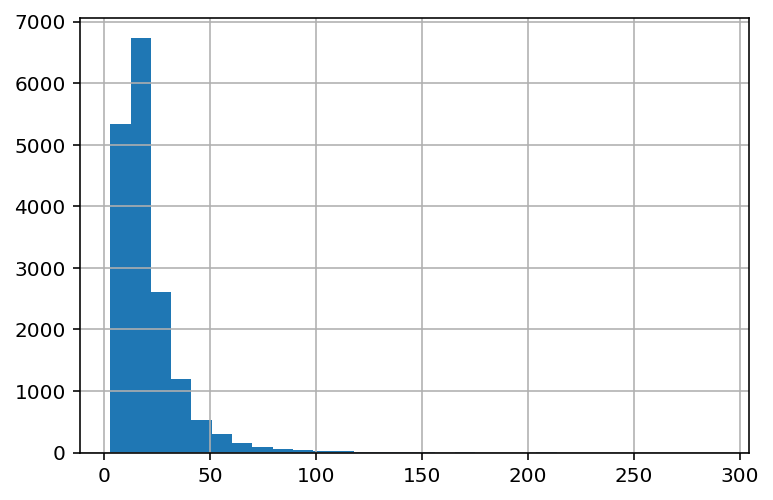

In [ ]:
# get length of all the messages in the train set
seq_len = [len(tokenizer.encode(i)) for i in train_texts]

pd.Series(seq_len).hist(bins = 30)

In [ ]:
max_seq_len = 40
model = AutoModelForSequenceClassification.from_pretrained(BERT_MODEL_NAME, num_labels=2)


Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02-twitter were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmi

In [ ]:
train_encodings = tokenizer(train_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
val_encodings = tokenizer(val_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)
test_encodings = tokenizer(test_texts.to_list(), truncation=True, padding=True, max_length=max_seq_len)

In [ ]:
class TweetDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels.to_list()

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = TweetDataset(train_encodings, train_labels)
val_dataset = TweetDataset(val_encodings, val_labels)
test_dataset = TweetDataset(test_encodings, test_labels)

In [ ]:
train_dataset[0]


{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'input_ids': tensor([    2, 28441,  6646,   305,   786,  4802,   423, 10515, 17296, 18191,
          4764,   740,  6646,   786, 18764,   945,  7543,   647,  6646,   786,
           305,  2109,   619, 30001,     3,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]),
 'labels': tensor(1),
 'token_type_ids': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])}

In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# function to pass to out trainer in order to compute accuracy, f1 score, precision and recall
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='macro')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=5,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=64,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_strategy='epoch',
    evaluation_strategy='epoch'
    )

trainer = Trainer(
    model=model,                         # the instantiated 🤗 Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=val_dataset,             # evaluation dataset
    compute_metrics=compute_metrics
)

trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 17154
  Num Epochs = 1
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 537


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss


In [ ]:
trainer.predict(test_dataset)